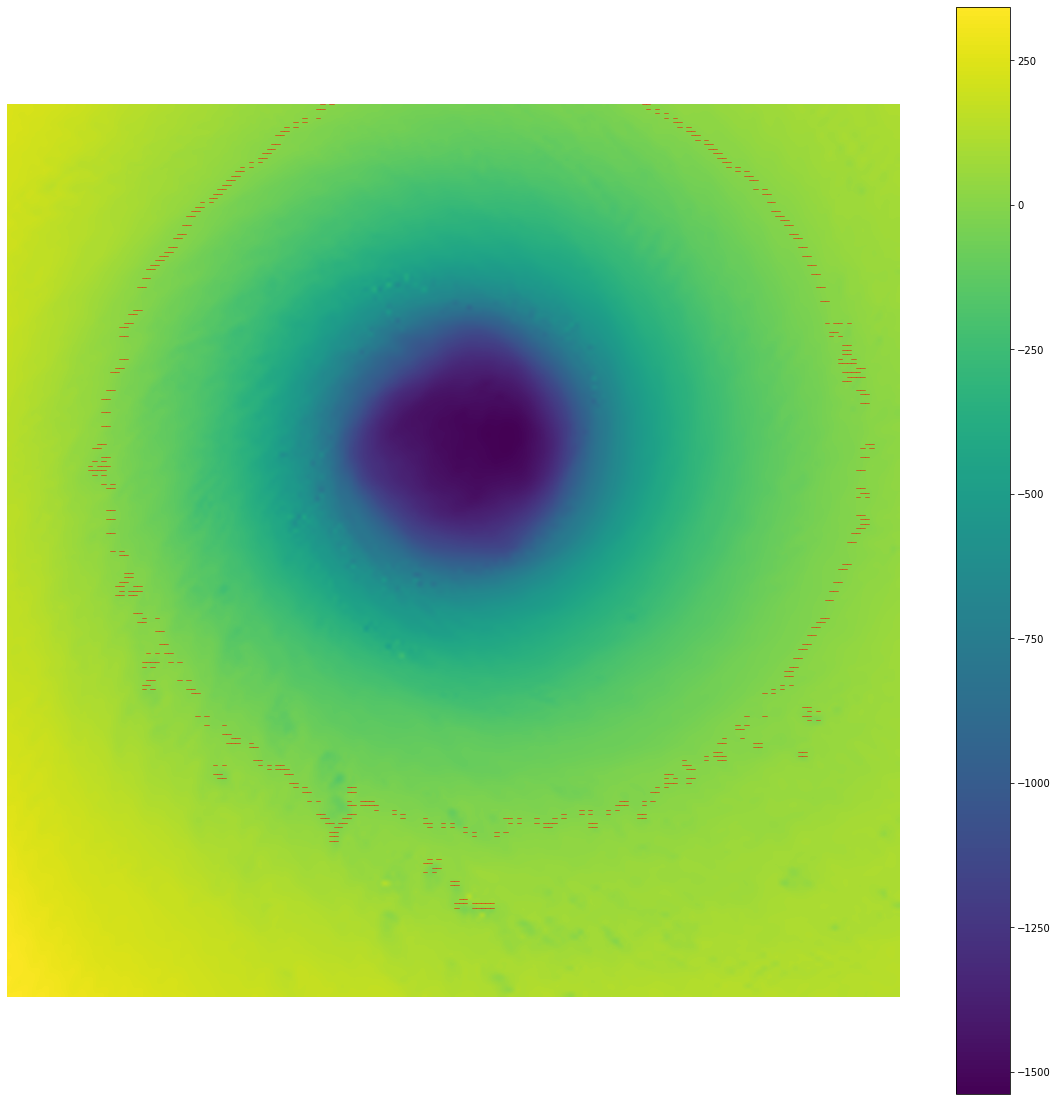

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
data2D = 0
data2DPlot = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="white"):
#     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=.5, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()
def isIsocontourCase(isovalue,value):
    counter = []
    for i in value:
        if  i>isovalue:
            a=True
            counter.append(a)
        elif  i<isovalue:    
            a=False
            counter.append(a)
    return counter

##### (TODO) WORK on this function
#####compute and draw the isocontour of the given datavalue ("isovalue")
#####color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
##### I do not mind the computation is efficnet or not
def computePlotIsoContour( isovalue, color ):
  for y in range(0, 199):
        for x in range(0, 199):
    # cell represents a pixel in the picture with 4 data values and its positions (x,y)
            cell_positions = np.array([(x,y),(x+1,y), (x,y+1), (x+1, y+1)])
            cell_values = np.array([getDataValue(x,y),getDataValue(x+1,y),getDataValue(x, y+1),getDataValue(x+1, y+1)])
            if(isIsocontourCase( isovalue,cell_values)):
                cellIso = np.where(cell_values > isovalue, True, False)
                if (cellIso.sum()==1 or cellIso.sum()==3 ):
                    
                    plotOneEdge(x0=cell_positions[0][0],
                    y0=cell_positions[0][1],
                    x1=cell_positions[1][0],
                    y1=cell_positions[1][1],
                    color=color
                    )
                elif (cellIso.sum()==2 and not (cellIso[0]==cellIso[3])):
                    
                    plotOneEdge(x0=cell_positions[0][0],
                    y0=cell_positions[0][1],
                    x1=cell_positions[1][0],
                    y1=cell_positions[1][1],
                    color=color
                    )
                #    plotOneEdge(x0= cell_values[0],y0=cell_values[1],x1= cell_values[2],y1=cell_values[3],color=color)
            
            # plotOneEdge(,color)
    # plt.contourf(data2DPlot)
           
 
  
##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()